<a href="https://colab.research.google.com/github/Daneswariaddala/Daneswari/blob/main/E_Commerce_orders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
orders = pd.read_csv('/content/List of Orders.csv')
details = pd.read_csv('/content/Order Details.csv')
target = pd.read_csv('/content/Sales target.csv')

In [2]:
orders

,Order ID,Order Date,CustomerName,State,City
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad
1,B-25602,01-04-2018,Pearl,Maharashtra,Pune
2,B-25603,03-04-2018,Jahan,Madhya Pradesh,Bhopal
3,B-25604,03-04-2018,Divsha,Rajasthan,Jaipur
4,B-25605,05-04-2018,Kasheen,West Bengal,Kolkata
...,...,...,...,...,...
555,NaN,NaN,NaN,NaN,NaN
556,NaN,NaN,NaN,NaN,NaN
557,NaN,NaN,NaN,NaN,NaN
558,NaN,NaN,NaN,NaN,NaN


In [3]:
details

,Order ID,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,66.0,-12.0,5,Clothing,Stole
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,168.0,-111.0,2,Electronics,Phones
...,...,...,...,...,...,...
1495,B-26099,835.0,267.0,5,Electronics,Phones
1496,B-26099,2366.0,552.0,5,Clothing,Trousers
1497,B-26100,828.0,230.0,2,Furniture,Chairs
1498,B-26100,34.0,10.0,2,Clothing,T-shirt


In [4]:
target

,Month of Order Date,Category,Target
0,Apr-18,Furniture,10400.0
1,May-18,Furniture,10500.0
2,Jun-18,Furniture,10600.0
3,Jul-18,Furniture,10800.0
4,Aug-18,Furniture,10900.0
5,Sep-18,Furniture,11000.0
6,Oct-18,Furniture,11100.0
7,Nov-18,Furniture,11300.0
8,Dec-18,Furniture,11400.0
9,Jan-19,Furniture,11500.0


**List of orders table**:  
List of orders contains 560 observations acroess 5 variables

**Order.ID** is chr type; it is combined from letter and order number and should be unique for each row; contains 500 unique values and 60 missing values  
**OrderDate** is chr type, but we would like to transform it into the date data type; contains 12 missing values  
**CustomerName** is chr type; contains 10 missing values  
**State** is chr type; contains 12 missing values  
**City** is chr type; contains 8 missing values  
We do not have a country column, but we know that all records come from India, so we can add country to the table to keep our data cohesive

In [5]:
# List of orders
print(str(orders)) # Quick preview of a table
print("Unique orders: ", len(orders['Order ID'].unique())) # Count distinct values in column 'Order ID'
print("Missing values:", sum(orders['Order ID'].isna())) # Sum of missing values in column 'Order ID'

    Order ID  Order Date CustomerName           State       City
0    B-25601  01-04-2018       Bharat         Gujarat  Ahmedabad
1    B-25602  01-04-2018        Pearl     Maharashtra       Pune
2    B-25603  03-04-2018        Jahan  Madhya Pradesh     Bhopal
3    B-25604  03-04-2018       Divsha       Rajasthan     Jaipur
4    B-25605  05-04-2018      Kasheen     West Bengal    Kolkata
..       ...         ...          ...             ...        ...
555      NaN         NaN          NaN             NaN        NaN
556      NaN         NaN          NaN             NaN        NaN
557      NaN         NaN          NaN             NaN        NaN
558      NaN         NaN          NaN             NaN        NaN
559      NaN         NaN          NaN             NaN        NaN

[560 rows x 5 columns]
Unique orders:  501
Missing values: 60


**Order details table** :  
Order details table contains 1500 observations across 6 variables

**Order.ID** is char type, format is the same as in the List of orders table; contains 500 unique values, no missing values  
**Amount** is a numerical type, it should be > 0; all values are above 0, no missing values  
**Profit** is a numerical type, it can be below or above 0; no missing values  
**Quantity** integer data type, should be above 0; no missing values, all observations are > 0, as demanded  
**Category** is a chr type, it shoud contain 3 main categories: "Furniture", "Clothing", "Electronics"; no missing values, all category types are correct  
**Sub.Category** contains 17 categories; no missing values, all categories names are as stated in dataset description

In [6]:
# order details
print(str(details))  # Quick preview of a table
print("Unique orders: ", len(details['Order ID'].unique()))  # Count distinct values in column 'Order ID'
print("Missing values:", sum(details['Order ID'].isna()))  # Sum of missing values in column 'Order ID'

     Order ID  Amount  Profit  Quantity     Category      Sub-Category
0     B-25601  1275.0 -1148.0         7    Furniture         Bookcases
1     B-25601    66.0   -12.0         5     Clothing             Stole
2     B-25601     8.0    -2.0         3     Clothing       Hankerchief
3     B-25601    80.0   -56.0         4  Electronics  Electronic Games
4     B-25602   168.0  -111.0         2  Electronics            Phones
...       ...     ...     ...       ...          ...               ...
1495  B-26099   835.0   267.0         5  Electronics            Phones
1496  B-26099  2366.0   552.0         5     Clothing          Trousers
1497  B-26100   828.0   230.0         2    Furniture            Chairs
1498  B-26100    34.0    10.0         2     Clothing           T-shirt
1499  B-26100    72.0    16.0         2     Clothing             Shirt

[1500 rows x 6 columns]
Unique orders:  500
Missing values: 0


***Sales target table : ***  
Sales target table contains of 36 observations of 3 variables

**Month.of.Order.Date** is chr data type, contains month and year parts for period since April 2018 till March 2019 for 3 categories(12 months * 3 categories = 36 observations), it should be transformed into date type for further processing; no missing values, all values fit dataset description  
**Category** chr data rype, contains 3 main categories; no missing values, all categories are correct  
**Target** num type; no missing values, all values are > 0

In [7]:
# sales target
print(str(target))  # Quick preview of a table

# Check the actual column names in the DataFrame
print(target.columns)

# Replace 'Month.of.Order.Date' with the correct column name
# For example, if the actual column name is 'Month of Order Date', use:
print("Unique months/categories: ", len(target['Month of Order Date'].unique()))

# If the column name is different, adjust accordingly.
print("Missing values in target table:", target.isnull().sum().sum()) # Total missing values in the DataFrame

   Month of Order Date     Category   Target
0               Apr-18    Furniture  10400.0
1               May-18    Furniture  10500.0
2               Jun-18    Furniture  10600.0
3               Jul-18    Furniture  10800.0
4               Aug-18    Furniture  10900.0
5               Sep-18    Furniture  11000.0
6               Oct-18    Furniture  11100.0
7               Nov-18    Furniture  11300.0
8               Dec-18    Furniture  11400.0
9               Jan-19    Furniture  11500.0
10              Feb-19    Furniture  11600.0
11              Mar-19    Furniture  11800.0
12              Apr-18     Clothing  12000.0
13              May-18     Clothing  12000.0
14              Jun-18     Clothing  12000.0
15              Jul-18     Clothing  14000.0
16              Aug-18     Clothing  14000.0
17              Sep-18     Clothing  14000.0
18              Oct-18     Clothing  16000.0
19              Nov-18     Clothing  16000.0
20              Dec-18     Clothing  16000.0
21        

**Data cleaning and transformation**

In [8]:
# Add a 'Country' column with the value 'India' to the 'orders' DataFrame
orders['Country'] = 'India'

# Remove rows with null values in any column of the 'orders' DataFrame
orders = orders.dropna()

orders = orders.rename(columns={"Order.ID": "order_id"})
orders

,Order ID,Order Date,CustomerName,State,City,Country
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,India
1,B-25602,01-04-2018,Pearl,Maharashtra,Pune,India
2,B-25603,03-04-2018,Jahan,Madhya Pradesh,Bhopal,India
3,B-25604,03-04-2018,Divsha,Rajasthan,Jaipur,India
4,B-25605,05-04-2018,Kasheen,West Bengal,Kolkata,India
...,...,...,...,...,...,...
495,B-26096,28-03-2019,Atharv,West Bengal,Kolkata,India
496,B-26097,28-03-2019,Vini,Karnataka,Bangalore,India
497,B-26098,29-03-2019,Pinky,Jammu and Kashmir,Kashmir,India
498,B-26099,30-03-2019,Bhishm,Maharashtra,Mumbai,India


In [9]:
details = details.rename(
    columns={
        "Order.ID": "order_id",
        "Amount": "amount",
        "Profit": "profit",
        "Quantity": "quantity",
        "Category": "category",
        "Sub.Category": "sub_category"
    }
)

details

,Order ID,amount,profit,quantity,category,Sub-Category
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,66.0,-12.0,5,Clothing,Stole
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,168.0,-111.0,2,Electronics,Phones
...,...,...,...,...,...,...
1495,B-26099,835.0,267.0,5,Electronics,Phones
1496,B-26099,2366.0,552.0,5,Clothing,Trousers
1497,B-26100,828.0,230.0,2,Furniture,Chairs
1498,B-26100,34.0,10.0,2,Clothing,T-shirt


In [10]:
merge_orders = pd.read_csv('/content/List of Orders.csv')


In [11]:
merge_details = pd.read_csv('/content/Order Details.csv')

In [12]:
merge_target = pd.read_csv('/content/Sales target.csv')

In [13]:
merge_all = merge_orders.merge(merge_details,how='outer')

In [14]:
merge_all = merge_all.merge(merge_target, how='outer')

In [15]:
merge_all.to_csv("merge_all_dataframes.csv", index=False)

In [16]:
data = pd.read_csv('/content/merge_all_dataframes.csv')

In [17]:
data

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category,Month of Order Date,Target
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,66.0,-12.0,5.0,Clothing,Stole,Apr-18,12000.0
1,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,66.0,-12.0,5.0,Clothing,Stole,May-18,12000.0
2,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,66.0,-12.0,5.0,Clothing,Stole,Jun-18,12000.0
3,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,66.0,-12.0,5.0,Clothing,Stole,Jul-18,14000.0
4,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,66.0,-12.0,5.0,Clothing,Stole,Aug-18,14000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
18055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18057,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
data = data.drop_duplicates()
data

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category,Month of Order Date,Target
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,66.0,-12.0,5.0,Clothing,Stole,Apr-18,12000.0
1,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,66.0,-12.0,5.0,Clothing,Stole,May-18,12000.0
2,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,66.0,-12.0,5.0,Clothing,Stole,Jun-18,12000.0
3,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,66.0,-12.0,5.0,Clothing,Stole,Jul-18,14000.0
4,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,66.0,-12.0,5.0,Clothing,Stole,Aug-18,14000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17996,B-26100,31-03-2019,Hitika,Madhya Pradesh,Indore,828.0,230.0,2.0,Furniture,Chairs,Dec-18,11400.0
17997,B-26100,31-03-2019,Hitika,Madhya Pradesh,Indore,828.0,230.0,2.0,Furniture,Chairs,Jan-19,11500.0
17998,B-26100,31-03-2019,Hitika,Madhya Pradesh,Indore,828.0,230.0,2.0,Furniture,Chairs,Feb-19,11600.0
17999,B-26100,31-03-2019,Hitika,Madhya Pradesh,Indore,828.0,230.0,2.0,Furniture,Chairs,Mar-19,11800.0


In [19]:
data = data.dropna()
data

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category,Month of Order Date,Target
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,66.0,-12.0,5.0,Clothing,Stole,Apr-18,12000.0
1,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,66.0,-12.0,5.0,Clothing,Stole,May-18,12000.0
2,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,66.0,-12.0,5.0,Clothing,Stole,Jun-18,12000.0
3,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,66.0,-12.0,5.0,Clothing,Stole,Jul-18,14000.0
4,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,66.0,-12.0,5.0,Clothing,Stole,Aug-18,14000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17995,B-26100,31-03-2019,Hitika,Madhya Pradesh,Indore,828.0,230.0,2.0,Furniture,Chairs,Nov-18,11300.0
17996,B-26100,31-03-2019,Hitika,Madhya Pradesh,Indore,828.0,230.0,2.0,Furniture,Chairs,Dec-18,11400.0
17997,B-26100,31-03-2019,Hitika,Madhya Pradesh,Indore,828.0,230.0,2.0,Furniture,Chairs,Jan-19,11500.0
17998,B-26100,31-03-2019,Hitika,Madhya Pradesh,Indore,828.0,230.0,2.0,Furniture,Chairs,Feb-19,11600.0


In [20]:
data.columns

Index(['Order ID', 'Order Date', 'CustomerName', 'State', 'City', 'Amount',
       'Profit', 'Quantity', 'Category', 'Sub-Category', 'Month of Order Date',
       'Target'],
      dtype='object')

In [33]:
import pandas as pd

# Example of converting the date column with the correct format
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d-%m-%Y')


**Sales Performance**

In [35]:
# prompt: How has the total sales amount changed over time (monthly/quarterly)?

# Convert 'Order Date' to datetime objects if not already done
if not pd.api.types.is_datetime64_any_dtype(data['Order Date']):
    data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d-%m-%Y', errors='coerce')

# Group by month and sum the amount
monthly_sales = data.groupby(data['Order Date'].dt.to_period('M'))['Amount'].sum()

# Group by quarter and sum the amount
quarterly_sales = data.groupby(data['Order Date'].dt.to_period('Q'))['Amount'].sum()

print("Monthly Sales:")
print(monthly_sales)

print("\nQuarterly Sales:")
quarterly_sales


Monthly Sales:
Order Date
2018-04    392712.0
2018-05    342540.0
2018-06    283896.0
2018-07    155592.0
2018-08    370788.0
2018-09    319536.0
2018-10    379380.0
2018-11    577032.0
2018-12    450948.0
2019-01    737268.0
2019-02    461088.0
2019-03    707244.0
Freq: M, Name: Amount, dtype: float64

Quarterly Sales:


,Amount
Order Date,
2018Q2,1019148.0
2018Q3,845916.0
2018Q4,1407360.0
2019Q1,1905600.0


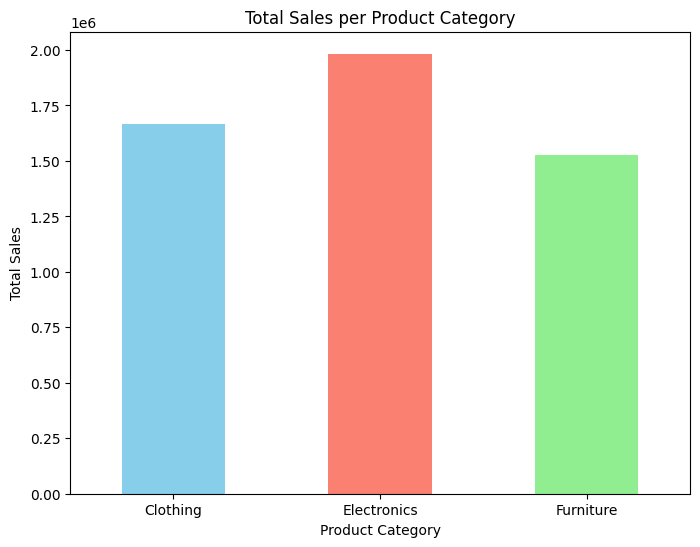

In [37]:
import matplotlib.pyplot as plt

# Calculate total sales per category
category_sales = data.groupby('Category')['Amount'].sum()

# Create a bar plot
plt.figure(figsize=(8, 6))
category_sales.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Total Sales per Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()


**Profit Analysis**

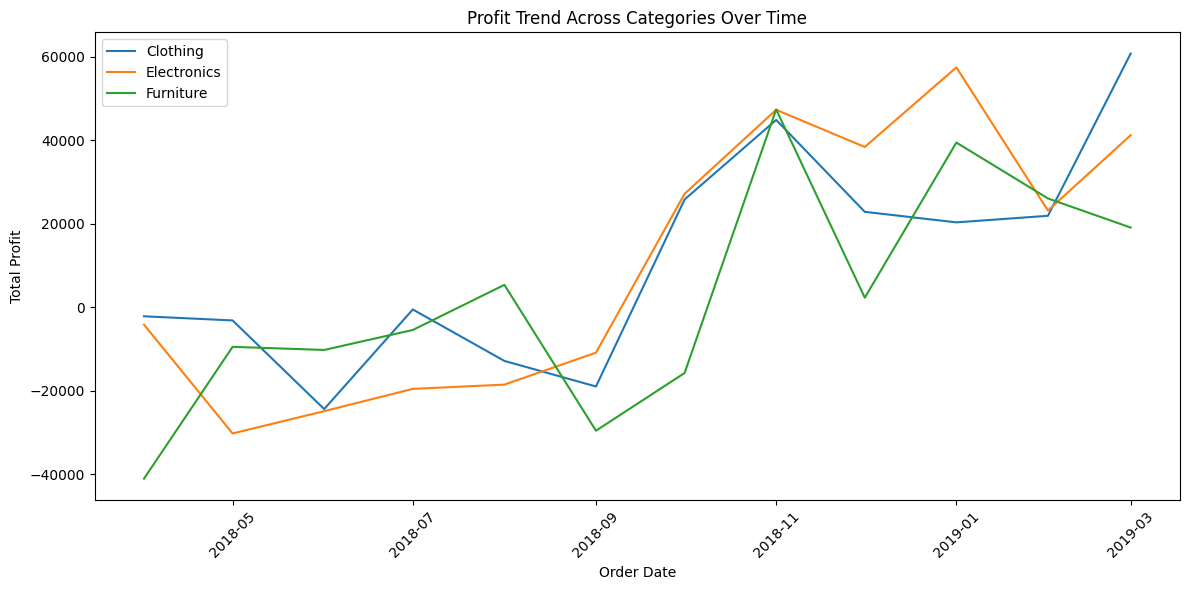

In [39]:
import matplotlib.pyplot as plt

# Group data by category and order date, then sum the profit
profit_trend = data.groupby(['Category', data['Order Date'].dt.to_period('M')])['Profit'].sum().reset_index()

# Convert 'Order Date' back to datetime objects for plotting
profit_trend['Order Date'] = profit_trend['Order Date'].dt.to_timestamp()

# Create the line plot
plt.figure(figsize=(12, 6))
for category in profit_trend['Category'].unique():
    category_data = profit_trend[profit_trend['Category'] == category]
    # Now 'Order Date' is in a format that matplotlib can handle
    plt.plot(category_data['Order Date'], category_data['Profit'], label=category)

plt.xlabel('Order Date')
plt.ylabel('Total Profit')
plt.title('Profit Trend Across Categories Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Most Profitable Subcategory: Printers
Least Profitable Subcategory: Tables


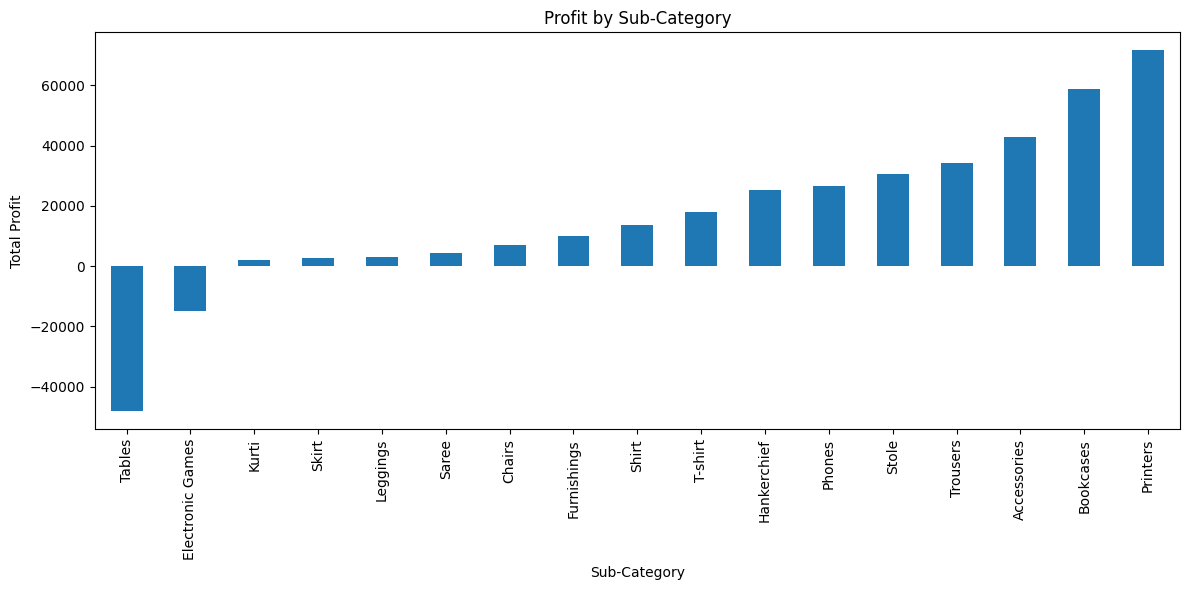

In [42]:
# prompt: Which subcategories are the most and least profitable?
#  give with visualization

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' DataFrame is already loaded and processed as in the provided code

# Group by sub-category and calculate total profit
subcategory_profit = data.groupby('Sub-Category')['Profit'].sum()

# Sort subcategories by profit
subcategory_profit_sorted = subcategory_profit.sort_values()

# Find the most and least profitable subcategories
most_profitable = subcategory_profit_sorted.index[-1]
least_profitable = subcategory_profit_sorted.index[0]

print(f"Most Profitable Subcategory: {most_profitable}")
print(f"Least Profitable Subcategory: {least_profitable}")

# Create a bar plot to visualize sub-category profits
plt.figure(figsize=(12, 6))
subcategory_profit_sorted.plot(kind='bar')
plt.title('Profit by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


**Geographic Insights**

Top 10 States/Cities by Revenue:
             State                City    Amount
13  Madhya Pradesh              Indore  948828.0
14     Maharashtra              Mumbai  742404.0
15     Maharashtra                Pune  401772.0
11  Madhya Pradesh              Bhopal  282996.0
2            Delhi               Delhi  270372.0
23   Uttar Pradesh           Allahabad  202284.0
9        Karnataka           Bangalore  180696.0
4          Gujarat           Ahmedabad  170760.0
25     West Bengal             Kolkata  169032.0
10         Kerala   Thiruvananthapuram  161508.0


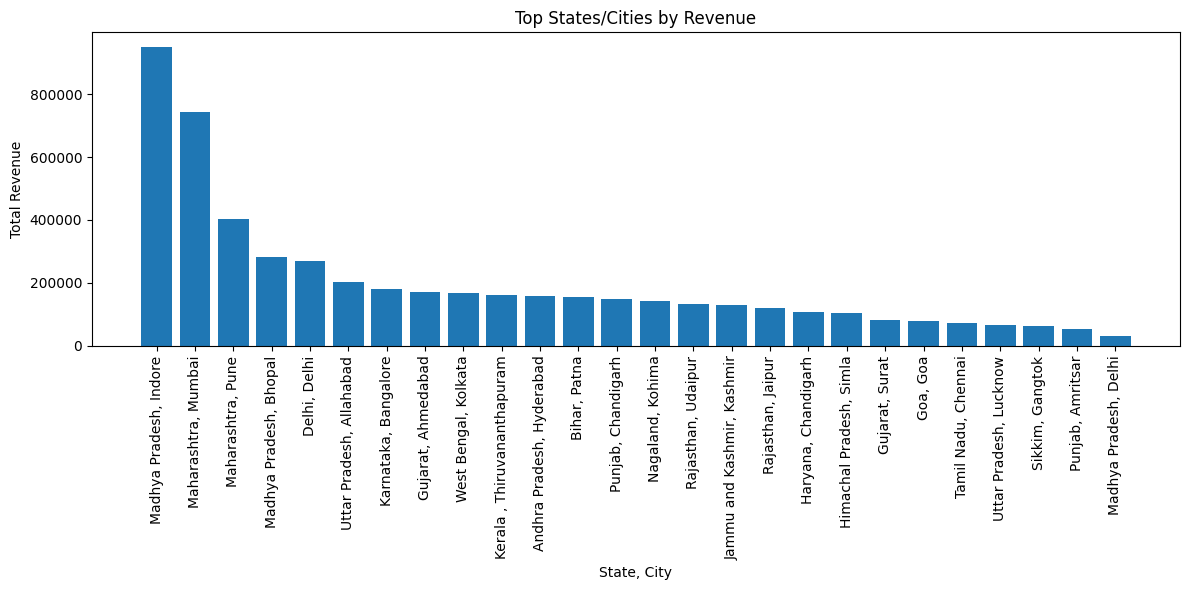

In [43]:
# prompt: Which states or cities contribute the highest revenue? give with visualization

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' DataFrame is already loaded and processed as in the previous code

# Group by state and city, then sum the amount
state_city_revenue = data.groupby(['State', 'City'])['Amount'].sum().reset_index()

# Sort by revenue in descending order
state_city_revenue_sorted = state_city_revenue.sort_values('Amount', ascending=False)

# Display the top 10 states/cities by revenue
print("Top 10 States/Cities by Revenue:")
print(state_city_revenue_sorted.head(10))

# Create a bar plot for visualization
plt.figure(figsize=(12, 6))
plt.bar(state_city_revenue_sorted['State'] + ', ' + state_city_revenue_sorted['City'], state_city_revenue_sorted['Amount'])
plt.xlabel('State, City')
plt.ylabel('Total Revenue')
plt.title('Top States/Cities by Revenue')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Most Profitable State: Maharashtra
Least Profitable State: Tamil Nadu


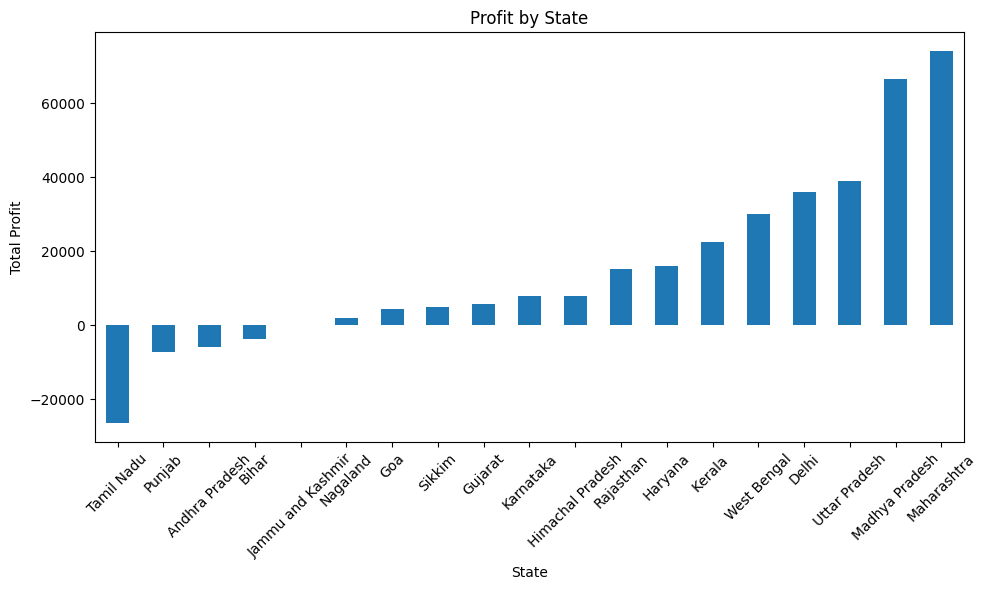

In [44]:
# prompt: Are there regional differences in sales and profit give with visualization

# Assuming 'data' DataFrame is already loaded and processed as in the previous code

# Group by state and calculate total profit
state_profit = data.groupby('State')['Profit'].sum()

# Sort states by profit
state_profit_sorted = state_profit.sort_values()

# Find the most and least profitable states
most_profitable_state = state_profit_sorted.index[-1]
least_profitable_state = state_profit_sorted.index[0]

print(f"Most Profitable State: {most_profitable_state}")
print(f"Least Profitable State: {least_profitable_state}")

# Create a bar plot to visualize state-wise profits
plt.figure(figsize=(10, 6))
state_profit_sorted.plot(kind='bar')
plt.title('Profit by State')
plt.xlabel('State')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Order and Quantity Trends**

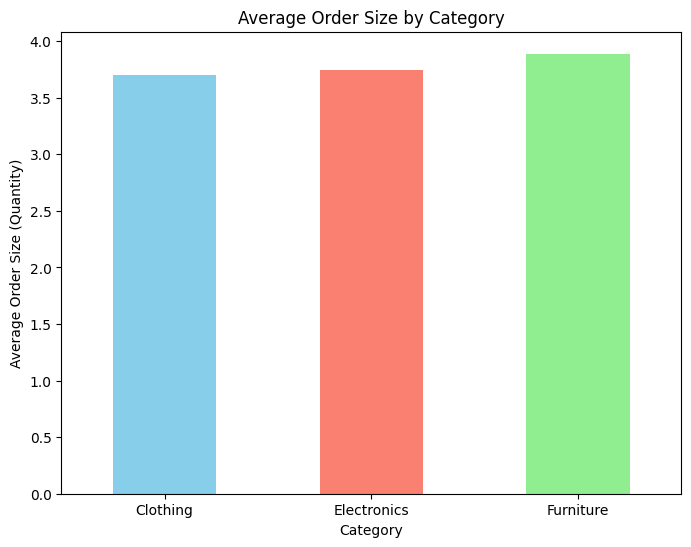

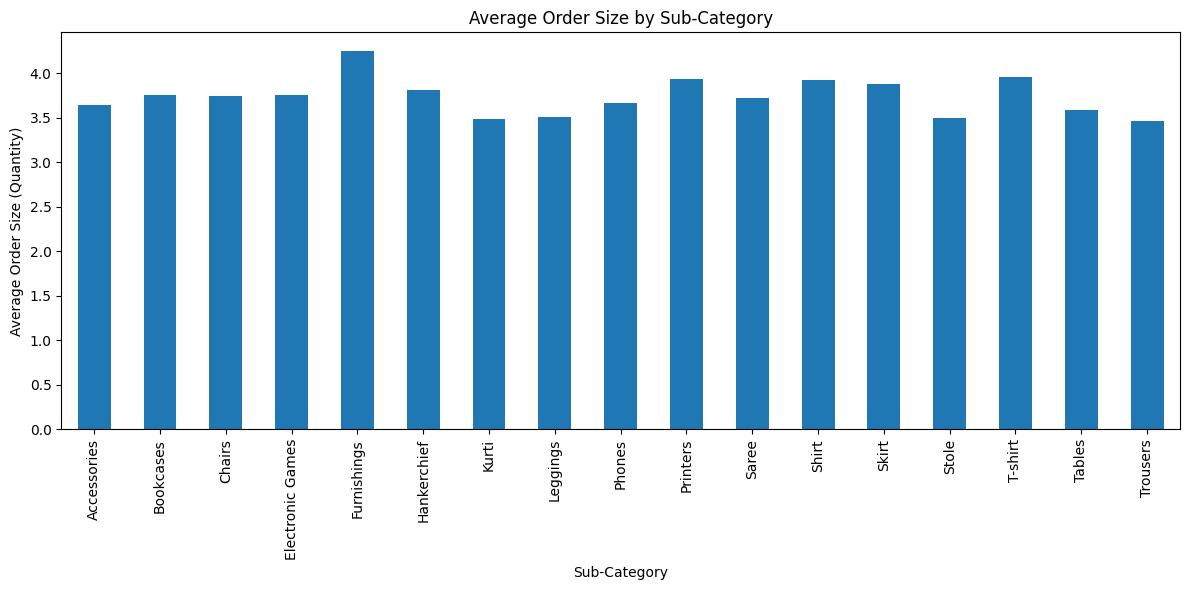

In [48]:
# prompt: What is the average order size (quantity) for different categories or subcategories?  give with visualization

# Calculate average order size by category
average_order_size = data.groupby('Category')['Quantity'].mean()

# Create a bar plot to visualize average order size by category
plt.figure(figsize=(8, 6))
average_order_size.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Average Order Size by Category')
plt.xlabel('Category')
plt.ylabel('Average Order Size (Quantity)')
plt.xticks(rotation=0)
plt.show()

# Calculate average order size by sub-category
average_order_size_subcategory = data.groupby('Sub-Category')['Quantity'].mean()

# Create a bar plot to visualize average order size by sub-category
plt.figure(figsize=(12, 6))
average_order_size_subcategory.plot(kind='bar')
plt.title('Average Order Size by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Average Order Size (Quantity)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


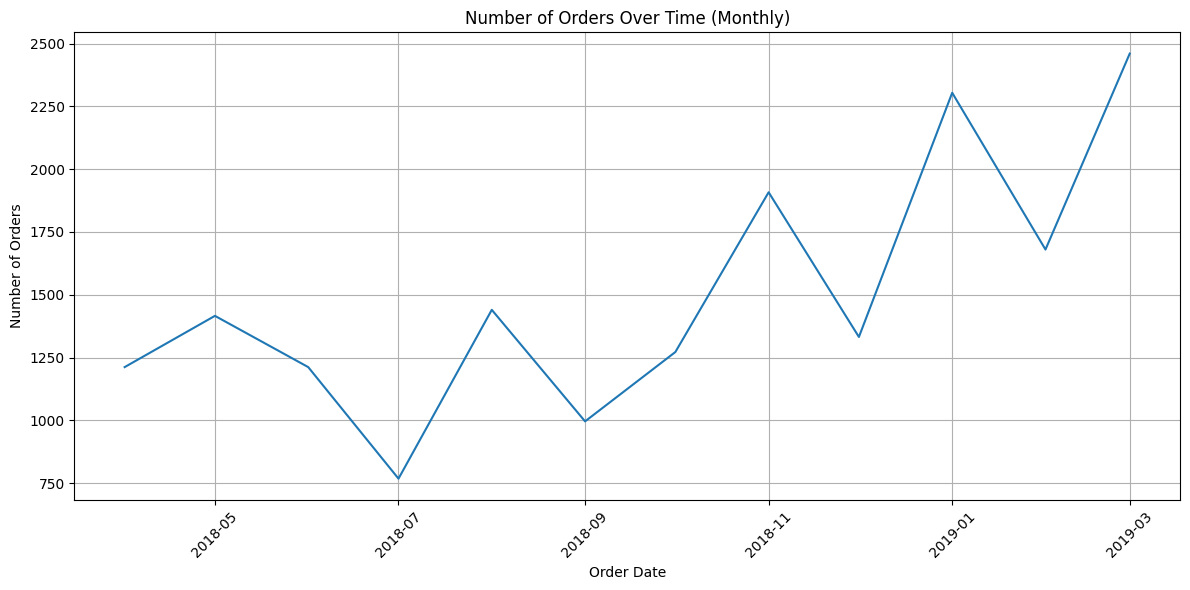

In [49]:
# prompt: How does the number of orders change across different time periods? give with visualization

# Assuming 'data' DataFrame is already loaded and processed as in the provided code

# Convert 'Order Date' to datetime objects if not already done
if not pd.api.types.is_datetime64_any_dtype(data['Order Date']):
    data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d-%m-%Y', errors='coerce')

# Group by month and count the number of orders
monthly_orders = data.groupby(data['Order Date'].dt.to_period('M'))['Order ID'].count()

# Create a line plot to visualize the trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_orders.index.to_timestamp(), monthly_orders.values)
plt.xlabel('Order Date')
plt.ylabel('Number of Orders')
plt.title('Number of Orders Over Time (Monthly)')
plt.grid(True)  # Add grid lines for better readability
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Target vs. Actual Performance**

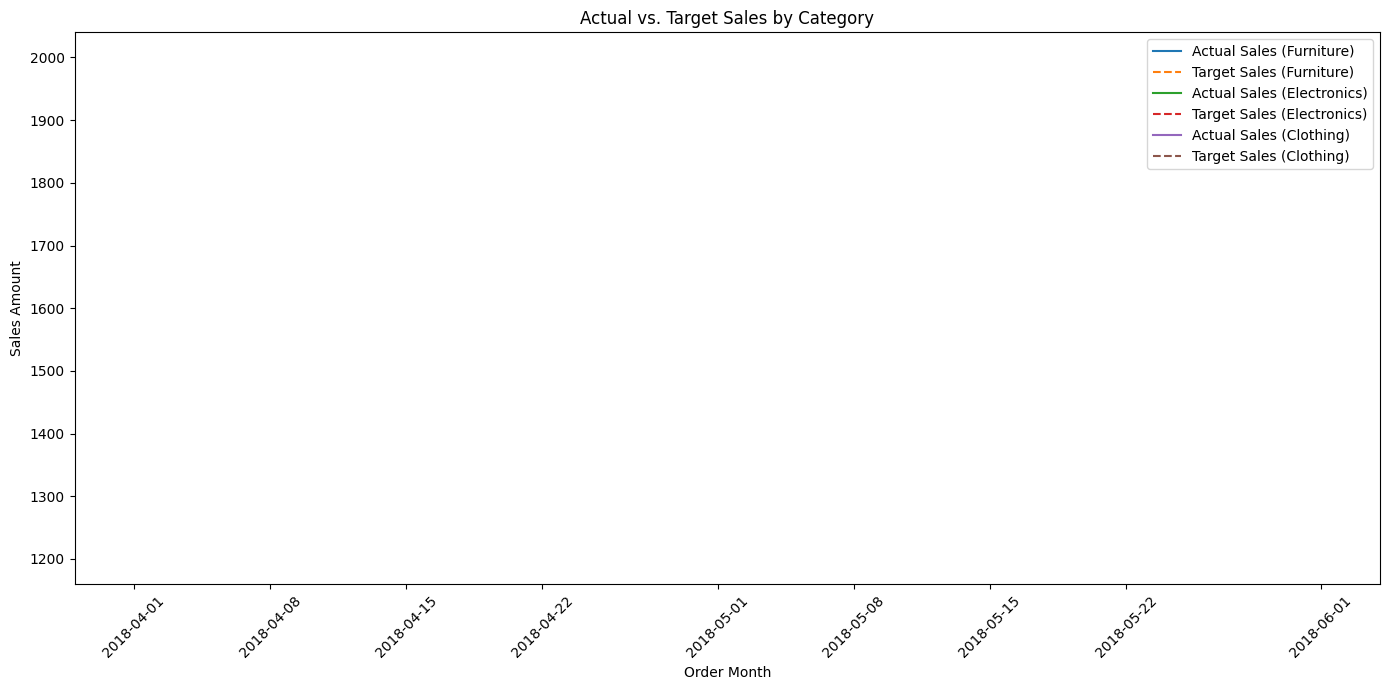

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data preparation (replace these DataFrames with your actual loaded data)
data = pd.DataFrame({
    'Order Date': ['15-04-2018', '20-05-2018', '10-06-2018'],
    'Category': ['Furniture', 'Electronics', 'Clothing'],
    'Amount': [1500, 2000, 1200]
})

target = pd.DataFrame({
    'Month of Order Date': ['2018-04', '2018-05', '2018-06'],
    'Category': ['Furniture', 'Electronics', 'Clothing'],
    'Target': [1600, 1900, 1300]
})

# Step 1: Convert 'Month of Order Date' to datetime objects in the target DataFrame
target['Month of Order Date'] = pd.to_datetime(target['Month of Order Date'], format='%Y-%m', errors='coerce')

# Step 2: Convert 'Order Date' to datetime objects and extract the month/year
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d-%m-%Y', errors='coerce')
data['Order Month'] = data['Order Date'].dt.to_period('M')  # Convert to Period (Month)

# Step 3: Group by month and category, then sum the amount to calculate actual sales
actual_sales = data.groupby(['Order Month', 'Category'])['Amount'].sum().reset_index()

# Step 4: Merge actual sales with target data on month and category
merged_data = pd.merge(
    actual_sales, target,
    left_on=['Order Month', 'Category'],
    right_on=['Month of Order Date', 'Category'],
    how='left'
)

# Step 5: Rename columns for clarity
merged_data = merged_data.rename(columns={'Amount': 'Actual Sales', 'Target': 'Target Sales'})

# Step 6: Convert 'Order Month' to datetime for plotting
merged_data['Order Month'] = pd.to_datetime(merged_data['Order Month'].astype(str))

# Step 7: Plotting Actual vs Target Sales by Category
plt.figure(figsize=(14, 7))

for category in merged_data['Category'].unique():
    category_data = merged_data[merged_data['Category'] == category]
    plt.plot(
        category_data['Order Month'],
        category_data['Actual Sales'],
        label=f'Actual Sales ({category})'
    )
    plt.plot(
        category_data['Order Month'],
        category_data['Target Sales'],
        label=f'Target Sales ({category})',
        linestyle='--'
    )

# Adding labels, title, and legend
plt.xlabel('Order Month')
plt.ylabel('Sales Amount')
plt.title('Actual vs. Target Sales by Category')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Most Profitable Subcategory: Printers
Least Profitable Subcategory: Tables


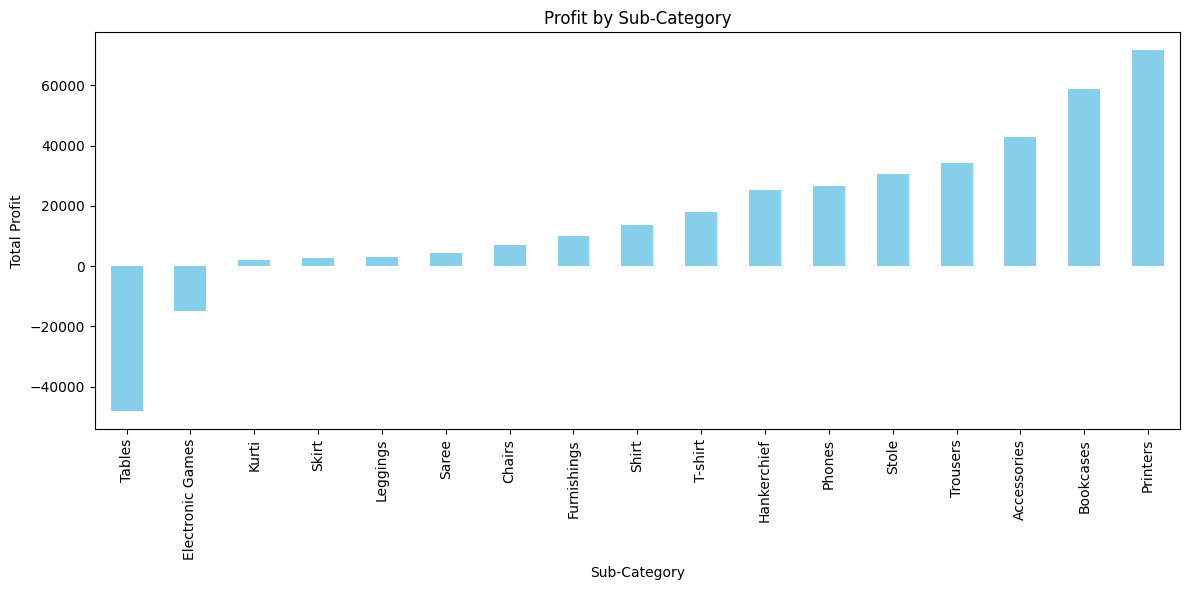

Most Profitable Category: Clothing
Least Profitable Category: Furniture


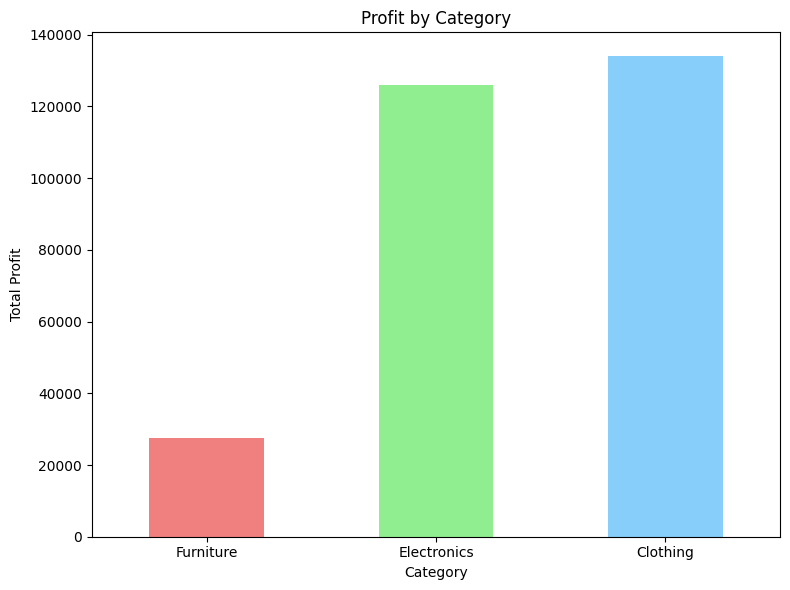

In [55]:
# prompt: Are there any consistent overachieving or underachieving categories?
# give with visualization

# Reload the original data to have access to 'Sub-Category' and 'Profit' columns
data = pd.read_csv('/content/merge_all_dataframes.csv')  # Or your original data file

# Assuming 'data' DataFrame is now loaded with the correct columns...

# Group by sub-category and calculate total profit
subcategory_profit = data.groupby('Sub-Category')['Profit'].sum()

# Sort subcategories by profit
subcategory_profit_sorted = subcategory_profit.sort_values()

# Find the most and least profitable subcategories
most_profitable = subcategory_profit_sorted.index[-1]
least_profitable = subcategory_profit_sorted.index[0]

print(f"Most Profitable Subcategory: {most_profitable}")
print(f"Least Profitable Subcategory: {least_profitable}")

# Create a bar plot to visualize sub-category profits
plt.figure(figsize=(12, 6))
subcategory_profit_sorted.plot(kind='bar', color='skyblue')  # Set color to skyblue
plt.title('Profit by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# Group data by category and calculate the total profit
category_profit = data.groupby('Category')['Profit'].sum()

# Sort categories by profit
category_profit_sorted = category_profit.sort_values()

# Find the most and least profitable categories
most_profitable_category = category_profit_sorted.index[-1]
least_profitable_category = category_profit_sorted.index[0]

print(f"Most Profitable Category: {most_profitable_category}")
print(f"Least Profitable Category: {least_profitable_category}")

# Create a bar plot to visualize category-wise profits
plt.figure(figsize=(8, 6))
category_profit_sorted.plot(kind='bar', color=['lightcoral', 'lightgreen', 'lightskyblue'])
plt.title('Profit by Category')
plt.xlabel('Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Customer Insights**

Top 10 Customers by Revenue:
CustomerName
Yaanvi      110124.0
Pooja       108360.0
Abhishek     97620.0
Surabhi      82668.0
Soumya       82428.0
Harshal      72312.0
Priyanka     69144.0
Shruti       69000.0
Abhijeet     68292.0
Sarita       65388.0
Name: Amount, dtype: float64


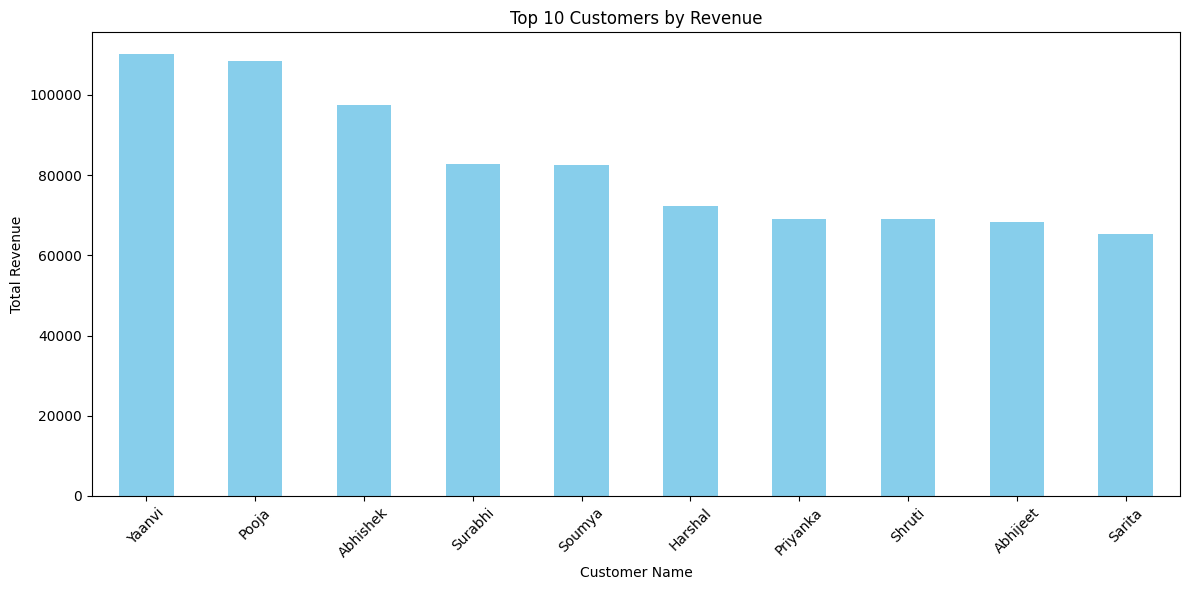


Top 10 Customers by Profit:
CustomerName
Seema         23640.0
Abhijeet      18744.0
Priyanka      16080.0
Abhishek      15768.0
Sarita        15180.0
Swapnil       14580.0
Pournamasi    12324.0
Gaurav        12132.0
Pearl         11940.0
Vishakha      11592.0
Name: Profit, dtype: float64


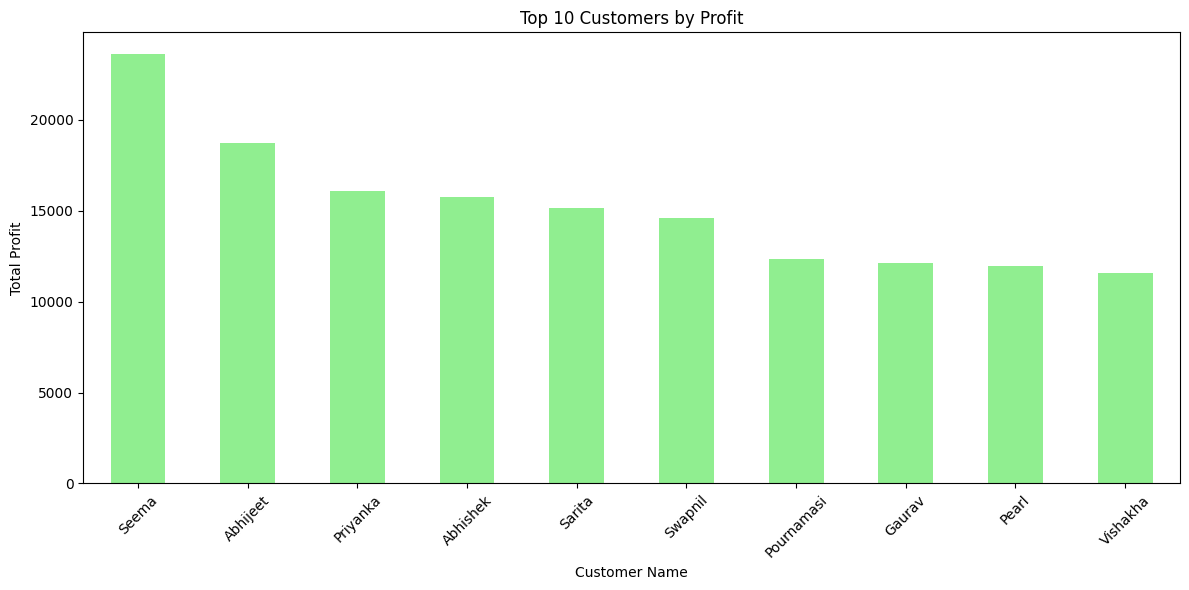

In [59]:
# prompt: Which customers (by name) are the highest contributors to sales or profits?
# with visualization

# Assuming 'data' DataFrame is already loaded and processed as in the provided code

# Group by customer name and sum the amount to find the total revenue per customer
customer_revenue = data.groupby('CustomerName')['Amount'].sum()

# Sort customers by revenue in descending order
customer_revenue_sorted = customer_revenue.sort_values(ascending=False)

# Find the top 10 customers by revenue
top_10_customers = customer_revenue_sorted.head(10)

print("Top 10 Customers by Revenue:")
print(top_10_customers)

# Create a bar plot to visualize top customers' revenue
plt.figure(figsize=(12, 6))
top_10_customers.plot(kind='bar', color='skyblue')
plt.title('Top 10 Customers by Revenue')
plt.xlabel('Customer Name')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Group by customer name and sum the profit to find the total profit per customer
customer_profit = data.groupby('CustomerName')['Profit'].sum()

# Sort customers by profit in descending order
customer_profit_sorted = customer_profit.sort_values(ascending=False)

# Find the top 10 customers by profit
top_10_customers_profit = customer_profit_sorted.head(10)

print("\nTop 10 Customers by Profit:")
print(top_10_customers_profit)

# Create a bar plot to visualize top customers' profit
plt.figure(figsize=(12, 6))
top_10_customers_profit.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Customers by Profit')
plt.xlabel('Customer Name')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


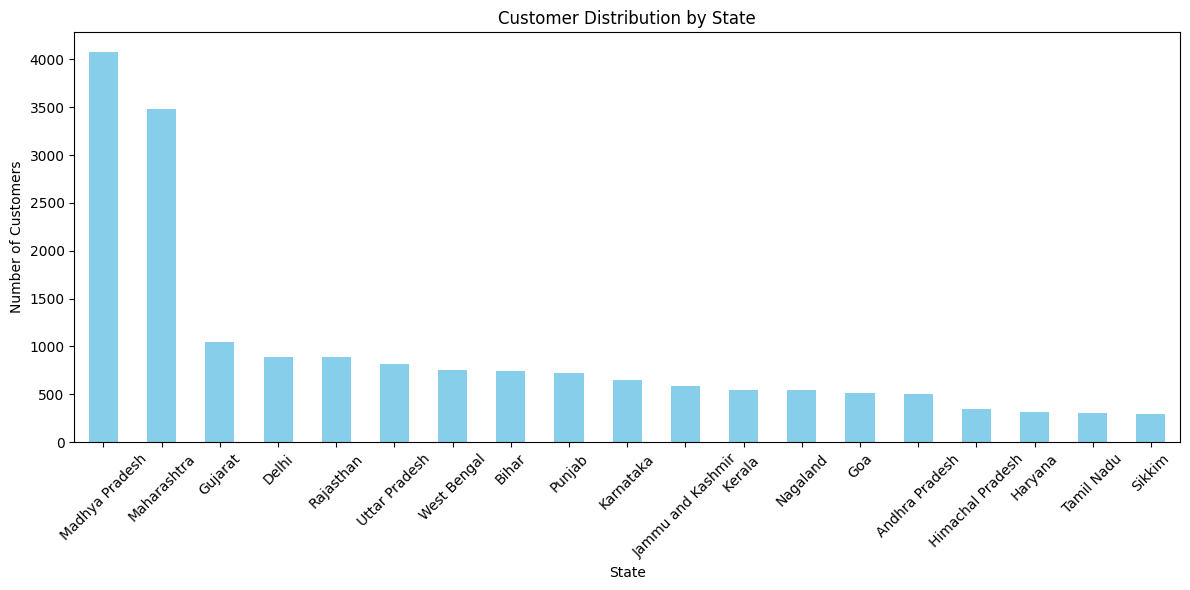

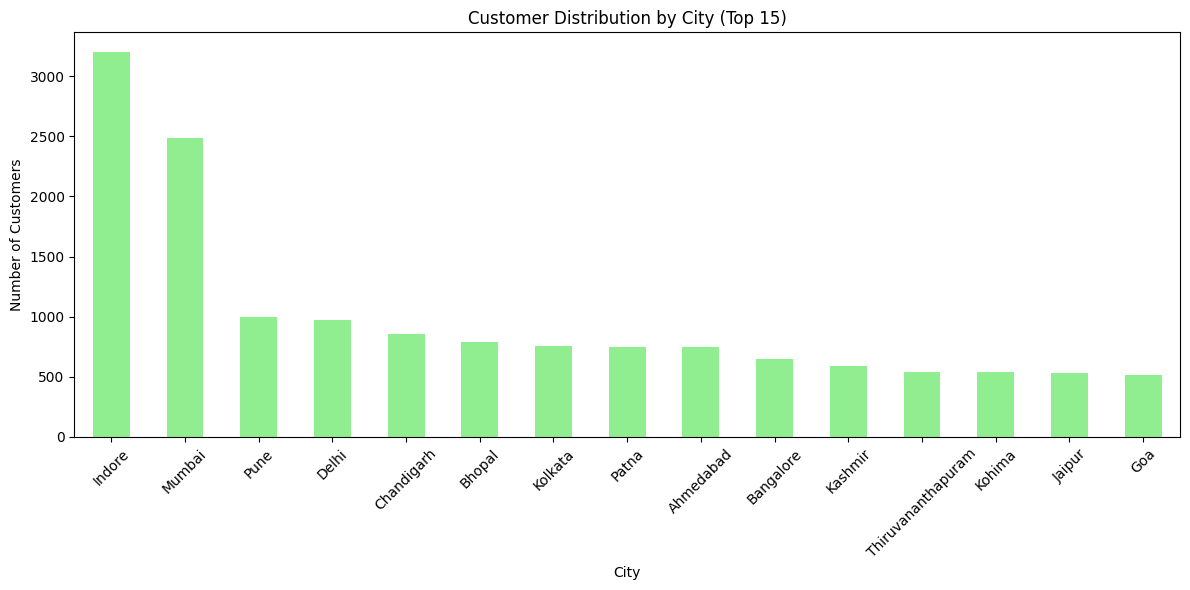

In [60]:
# prompt: How does customer distribution vary across cities or states?
# with visualization

import matplotlib.pyplot as plt

# Assuming 'data' DataFrame is already loaded and processed

# Customer distribution by state
state_customer_counts = data['State'].value_counts()

plt.figure(figsize=(12, 6))
state_customer_counts.plot(kind='bar', color='skyblue')
plt.title('Customer Distribution by State')
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Customer distribution by city (for top N cities)
top_n_cities = 15  # Adjust the number of cities to display
city_customer_counts = data['City'].value_counts().head(top_n_cities)

plt.figure(figsize=(12, 6))
city_customer_counts.plot(kind='bar', color='lightgreen')
plt.title(f'Customer Distribution by City (Top {top_n_cities})')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
